In [227]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [228]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head(30)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   
25           10      125             70             26      115  31.1   
26            7      147             76              0        0  39.4   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   
29            5      117             92              0        0  34.1   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1  
25                     0.205   41        1  
26                     0.257   43        1  
27                     0.487   22        0  
28                     0.245   57        0  
29                     0.337   38        0

In [229]:
print("Data type: ", type(diabetes))
print("Data Dims: ", diabetes.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data Dims:  (499, 9)


In [230]:
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<h2> Cleaning the dataset (Exploratory Data Analysis) (Separating them into different datasets (with) and (without) diabetes)

In [231]:
diabetes_with = diabetes[diabetes["Outcome"] == 1].copy()
diabetes_without = diabetes[diabetes["Outcome"] == 0].copy()

cols = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
for col in cols:
    diabetes_with[col] = diabetes_with[col].replace(0, np.NaN)
    diabetes_without[col] = diabetes_without[col].replace(0, np.NaN)

<h3> With Diabetes Dataset

In [232]:
diabetes_with.isnull().sum()


Pregnancies                  0
Glucose                      1
BloodPressure               12
SkinThickness               61
Insulin                      0
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

<h3> We do not consider variables such as Insulin which makes sense to have a 0 value (ie. No Insulin registered)

In [233]:
glucose_with = pd.DataFrame(diabetes_with["Glucose"])
blood_pressure_with = pd.DataFrame(diabetes_with["BloodPressure"])
skinthickness_with = pd.DataFrame(diabetes_with["SkinThickness"])
bmi_with = pd.DataFrame(diabetes_with["BMI"])


In [234]:
(
    glucose_with.info(),
    blood_pressure_with.info(),
    skinthickness_with.info(),
    bmi_with.info(),
)

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 498
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  181 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 498
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BloodPressure  170 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 498
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SkinThickness  121 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 498
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     181 non-null    flo

(None, None, None, None)

<h3> Summing up all the values of 0 in the variables we chose

In [235]:
(
    glucose_with.isnull().sum(),
    blood_pressure_with.isnull().sum(),
    skinthickness_with.isnull().sum(),
    bmi_with.isnull().sum(),
)

(Glucose    1
 dtype: int64,
 BloodPressure    12
 dtype: int64,
 SkinThickness    61
 dtype: int64,
 BMI    1
 dtype: int64)

In [236]:
glucose_with.dropna(inplace=True)
blood_pressure_with.dropna(inplace=True)
skinthickness_with.dropna(inplace=True)
bmi_with.dropna(inplace=True)


<h3> Taking out outliers before filling in 0 values with MEAN

In [237]:
# Function for outliers
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return (lower_limit, upper_limit)



In [238]:

# For diabetes_with dataframe
glucose_new_with = outliers(glucose_with)
blood_pressure_new_with = outliers(diabetes_with)
skinthickness_new_with = outliers(diabetes_with)
bmi_new_with = outliers(diabetes_with)

# Filtering diabetes_with dataframe
glucose_filtered_with = glucose_with[
    (glucose_with >= glucose_new_with[0])
    & (glucose_with <= glucose_new_with[1])
]
blood_pressure_filtered_with = blood_pressure_with[
    (diabetes_with >= blood_pressure_new_with[0])
    & (diabetes_with <= blood_pressure_new_with[1])
]
skinthickness_filtered_with = skinthickness_with[
    (diabetes_with >= skinthickness_new_with[0])
    & (diabetes_with <= skinthickness_new_with[1])
]
bmi_filtered_with = bmi_with[
    (diabetes_with >= bmi_new_with[0])
    & (diabetes_with <= bmi_new_with[1])
]



# Print counts
print(glucose_filtered_with.count())
print("")
print(blood_pressure_filtered_with.count())
print("")
print(skinthickness_filtered_with.count())
print("")
print(bmi_filtered_with.count())
print("")

Glucose    181
dtype: int64

BloodPressure    165
dtype: int64

SkinThickness    119
dtype: int64

BMI    175
dtype: int64



In [239]:
mean_glucose_filtered_with = glucose_filtered_with["Glucose"].mean() 
mean_blood_pressure_filtered_with = blood_pressure_filtered_with["BloodPressure"].mean()
mean_skinthickness_filtered_with = skinthickness_filtered_with["SkinThickness"].mean()
mean_bmi_filtered_with = bmi_filtered_with["BMI"].mean()

(
    mean_glucose_filtered_with,
    mean_blood_pressure_filtered_with,
    mean_skinthickness_filtered_with,
    mean_bmi_filtered_with,
)

(141.26519337016575, 74.4969696969697, 32.621848739495796, 34.79371428571428)

In [240]:
diabetes_with["Glucose"].fillna(mean_glucose_filtered_with.mean(), inplace=True)
diabetes_with["BloodPressure"].fillna(mean_blood_pressure_filtered_with.mean(), inplace=True)
diabetes_with["SkinThickness"].fillna(mean_skinthickness_filtered_with.mean(), inplace=True)
diabetes_with["BMI"].fillna(mean_bmi_filtered_with.mean(), inplace=True)

In [241]:
(
    diabetes_with["Glucose"].isnull().sum(),
    diabetes_with["BloodPressure"].isnull().sum(),
    diabetes_with["SkinThickness"].isnull().sum(),
    diabetes_with["BMI"].isnull().sum(),
)

(0, 0, 0, 0)

<h2> Without diabetes dataset (Repeating the same process from the "with diabetes" dataset)

In [242]:
diabetes_without.isnull().sum()

Pregnancies                  0
Glucose                      3
BloodPressure               12
SkinThickness               83
Insulin                      0
BMI                          7
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [243]:
glucose_without = pd.DataFrame(diabetes_without["Glucose"])
blood_pressure_without = pd.DataFrame(diabetes_without["BloodPressure"])
skinthickness_without = pd.DataFrame(diabetes_without["SkinThickness"])
bmi_without = pd.DataFrame(diabetes_without["BMI"])

In [244]:
(
    glucose_without.info(),
    blood_pressure_without.info(),
    skinthickness_without.info(),
    bmi_without.info(),
)

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 1 to 497
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  314 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 1 to 497
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BloodPressure  305 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 1 to 497
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SkinThickness  234 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 1 to 497
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     310 non-null    flo

(None, None, None, None)

In [245]:
(
glucose_without.isnull().sum(),
blood_pressure_without.isnull().sum(),
skinthickness_without.isnull().sum(),
bmi_without.isnull().sum(),
)



(Glucose    3
 dtype: int64,
 BloodPressure    12
 dtype: int64,
 SkinThickness    83
 dtype: int64,
 BMI    7
 dtype: int64)

In [246]:
glucose_without.dropna(inplace=True)
blood_pressure_without.dropna(inplace=True)
skinthickness_without.dropna(inplace=True)
bmi_without.dropna(inplace=True)

In [247]:
# For diabetes_without dataframe
glucose_new_without = outliers(glucose_without)
blood_pressure_new_without = outliers(blood_pressure_without)
skinthickness_new_without = outliers(skinthickness_without)
bmi_new_without = outliers(bmi_without)


# Filtering diabetes_without dataframe
glucose_filtered_without = glucose_without[
    (glucose_without >= glucose_new_without[0])
    & (glucose_without <= glucose_new_without[1])
]
blood_pressure_filtered_without = blood_pressure_without[
    (blood_pressure_without >= blood_pressure_new_without[0])
    & (blood_pressure_without <= blood_pressure_new_without[1])
]
skinthickness_filtered_without = skinthickness_without[
    (skinthickness_without >= skinthickness_new_without[0])
    & (skinthickness_without <= skinthickness_new_without[1])
]
bmi_filtered_without = bmi_without[
    (bmi_without >= bmi_new_without[0])
    & (bmi_without <= bmi_new_without[1])
]
print(glucose_filtered_without.count())
print("")
print(blood_pressure_filtered_without.count())
print("")
print(skinthickness_filtered_without.count())
print("")
print(bmi_filtered_without.count())


Glucose    306
dtype: int64

BloodPressure    301
dtype: int64

SkinThickness    233
dtype: int64

BMI    309
dtype: int64


In [248]:
mean_glucose_filtered_without = glucose_filtered_without["Glucose"].mean()
mean_blood_pressure_filtered_without = blood_pressure_filtered_without["BloodPressure"].mean()
mean_skinthickness_filtered_without = skinthickness_filtered_without["SkinThickness"].mean()
mean_bmi_filtered_without = bmi_filtered_without["BMI"].mean()

(
    mean_glucose_filtered_without,
    mean_blood_pressure_filtered_without,
    mean_skinthickness_filtered_without,
    mean_bmi_filtered_without,
)

(109.90196078431373, 70.60797342192691, 26.84549356223176, 30.677022653721686)

In [249]:
diabetes_without["Glucose"].fillna(mean_glucose_filtered_without.mean(), inplace=True)
diabetes_without["BloodPressure"].fillna(mean_blood_pressure_filtered_without.mean(), inplace=True)
diabetes_without["SkinThickness"].fillna(mean_skinthickness_filtered_without.mean(), inplace=True)
diabetes_without["BMI"].fillna(mean_bmi_filtered_without.mean(), inplace=True)


In [250]:
(
    diabetes_without["Glucose"].isnull().sum(),
    diabetes_without["BloodPressure"].isnull().sum(),
    diabetes_without["SkinThickness"].isnull().sum(),
    diabetes_without["BMI"].isnull().sum(),
)

(0, 0, 0, 0)

<h2> Concatenating the entire dataset together with the cleaned data

In [251]:
diabetes_filtered = pd.concat(
    [
        diabetes_with[
            [
                "Pregnancies",
                "Age",
                "DiabetesPedigreeFunction",
                "Glucose",
                "BloodPressure",
                "SkinThickness",
                "BMI",
                "Insulin",
                "Outcome",
            ]
        ],
        diabetes_without[
            [
                "Pregnancies",
                "Age",
                "DiabetesPedigreeFunction",
                "Glucose",
                "BloodPressure",
                "SkinThickness",
                "BMI",
                "Insulin",
                "Outcome",
            ]
        ],
    ],
    ignore_index=True,
)

diabetes_filtered.describe()

Pregnancies         Age  DiabetesPedigreeFunction     Glucose  \
count   499.000000  499.000000                499.000000  499.000000   
mean      3.803607   33.086172                  0.485377  122.298539   
std       3.345786   11.636849                  0.345546   30.575398   
min       0.000000   21.000000                  0.078000   44.000000   
25%       1.000000   24.000000                  0.252000  100.000000   
50%       3.000000   29.000000                  0.383000  117.000000   
75%       6.000000   39.500000                  0.633500  142.000000   
max      17.000000   81.000000                  2.420000  197.000000   

       BloodPressure  SkinThickness         BMI     Insulin     Outcome  
count     499.000000     499.000000  499.000000  499.000000  499.000000  
mean       72.232985      29.028274   32.484635   80.390782    0.364729  
std        11.804293       8.800222    7.124981  119.774561    0.481837  
min        30.000000       7.000000   18.200000    0.000000    0.000000  
25%        64.000000      25.000000   27.400000    0.000000    0.000000  
50%        72.000000      28.000000   32.000000   36.000000    0.000000  
75%        80.000000      33.000000   36.600000  122.000000    1.000000  
max       122.000000      63.000000   67.100000  846.000000    1.000000

<h2> Plotting out the boxplot and KDE for the individual variables in each of the column

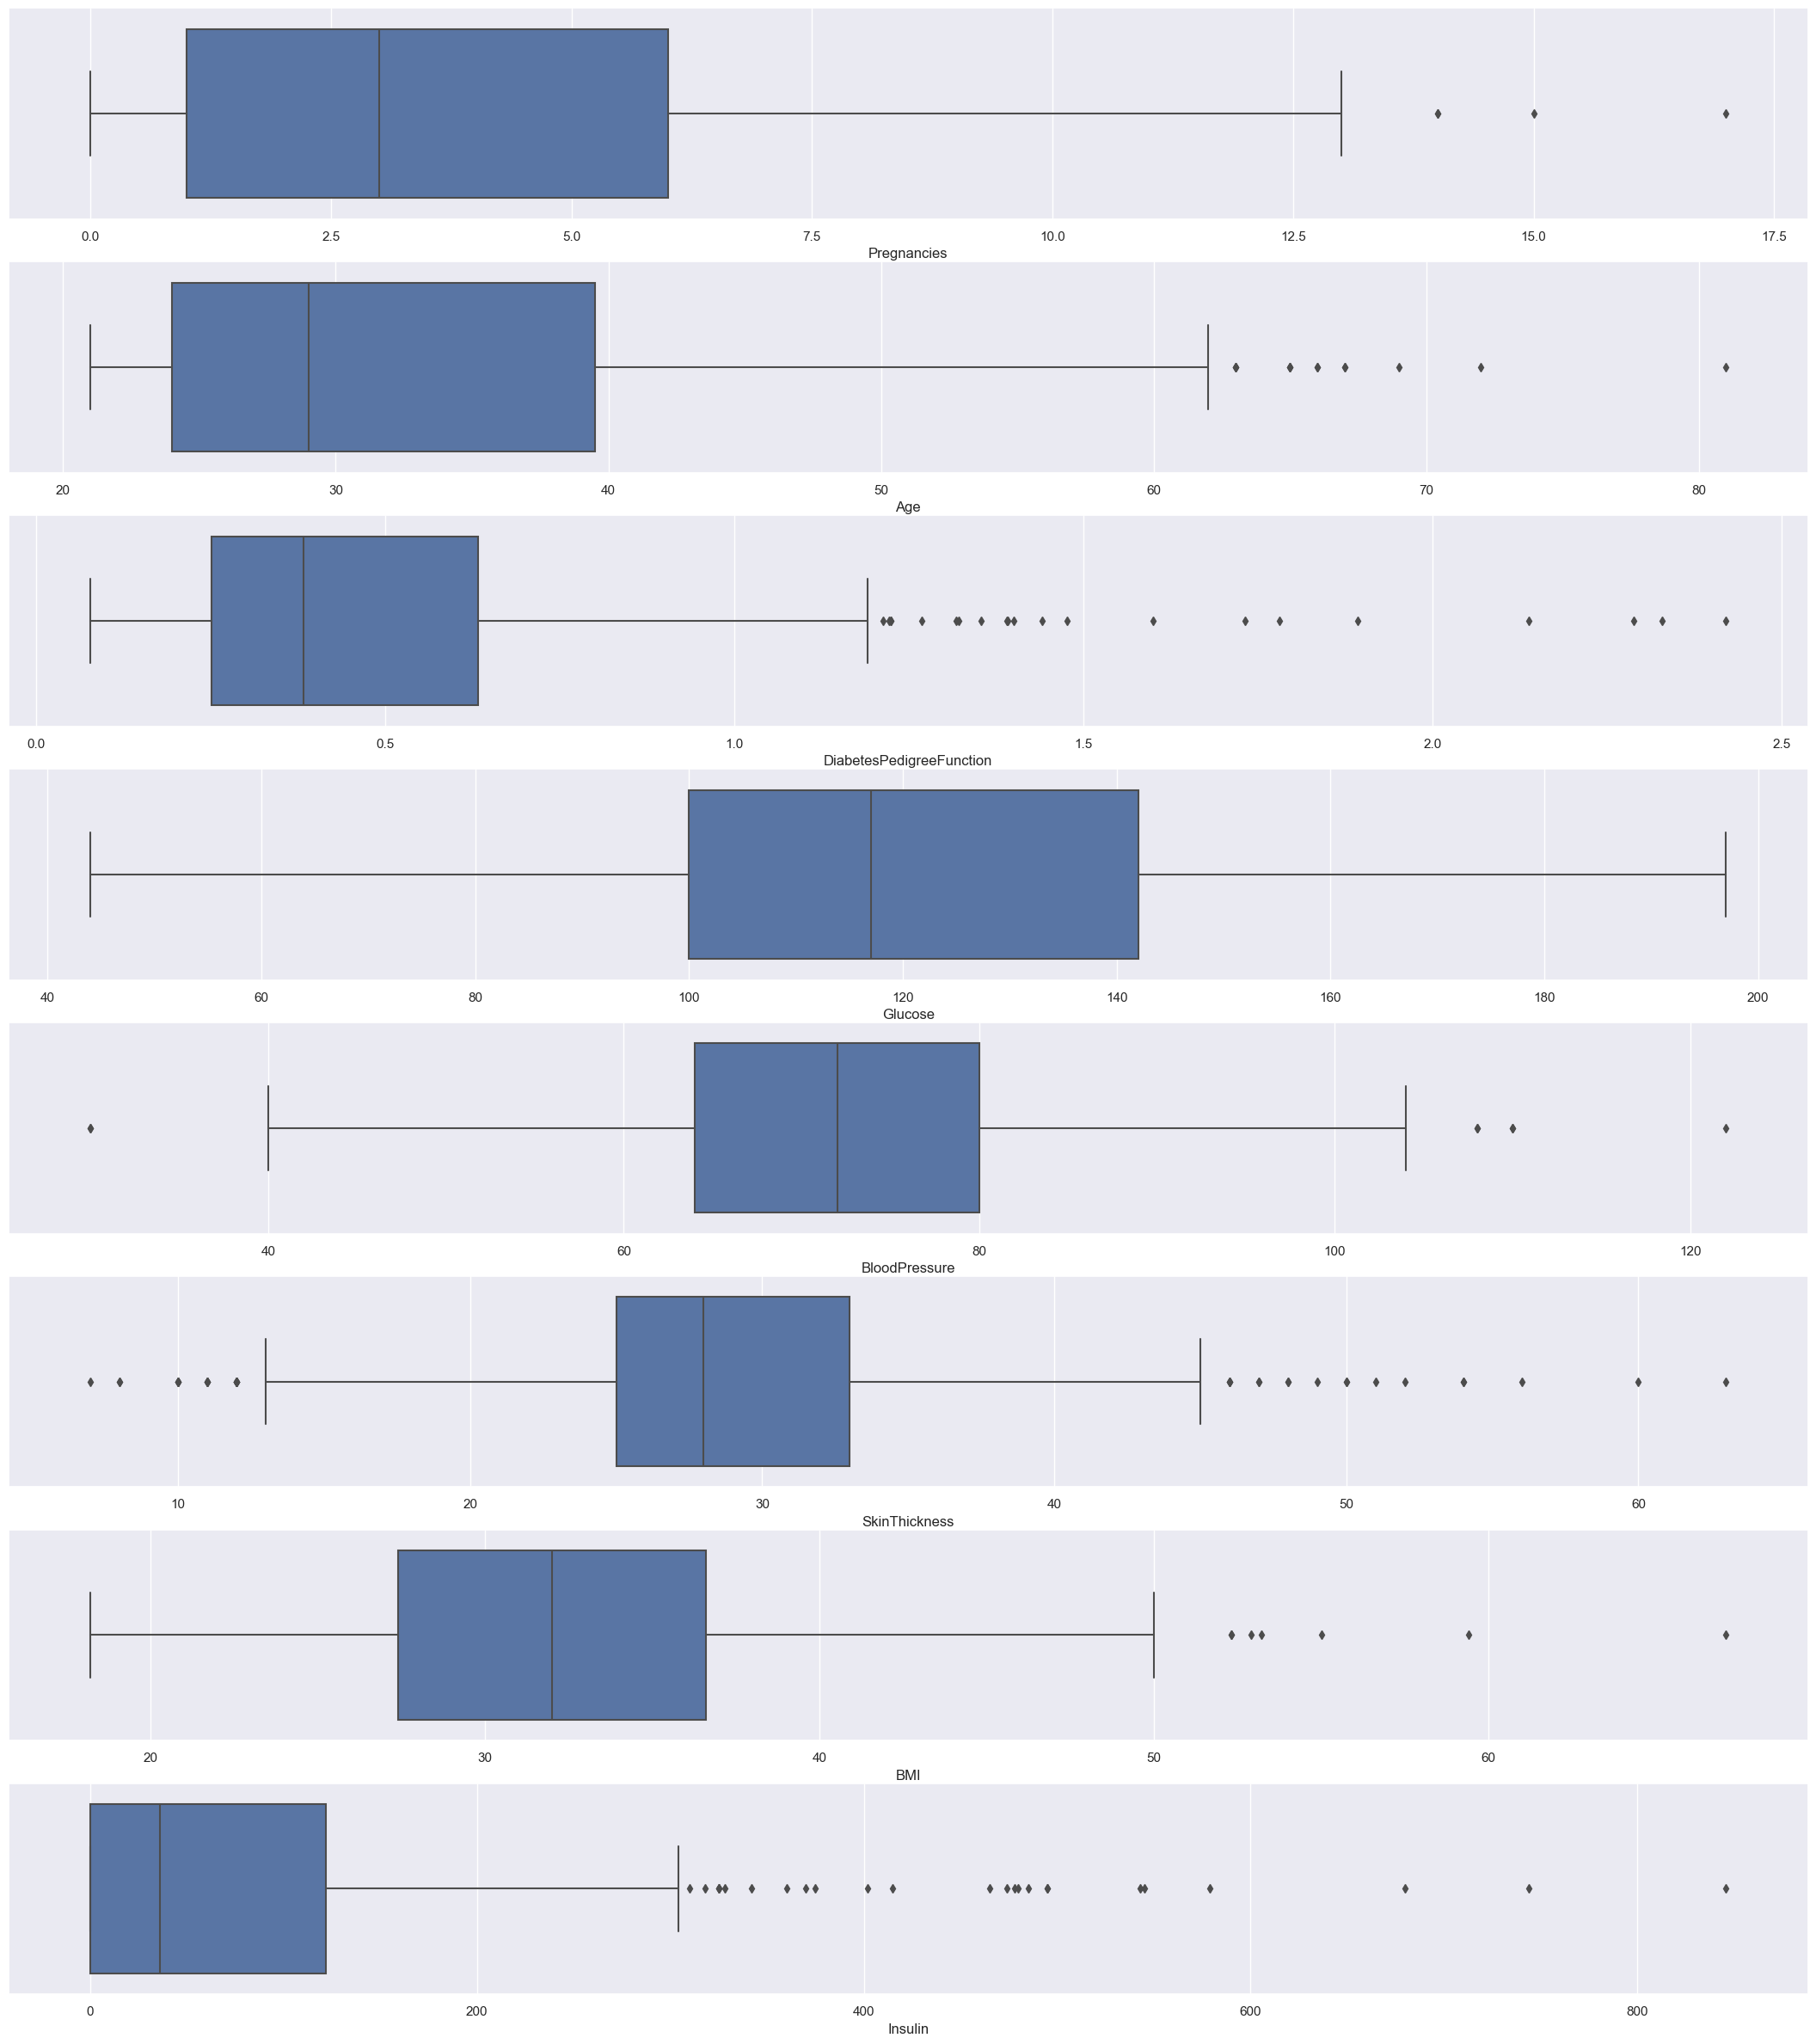

In [252]:
f, axes = plt.subplots(8, 1, figsize=(27, 30))
count = 0
for var in diabetes_filtered.columns:
    if count < 8:  # Ensure the count is within the range of axes
        sb.boxplot(data=diabetes_filtered, x=var, orient="h", ax=axes[count])
        count += 1

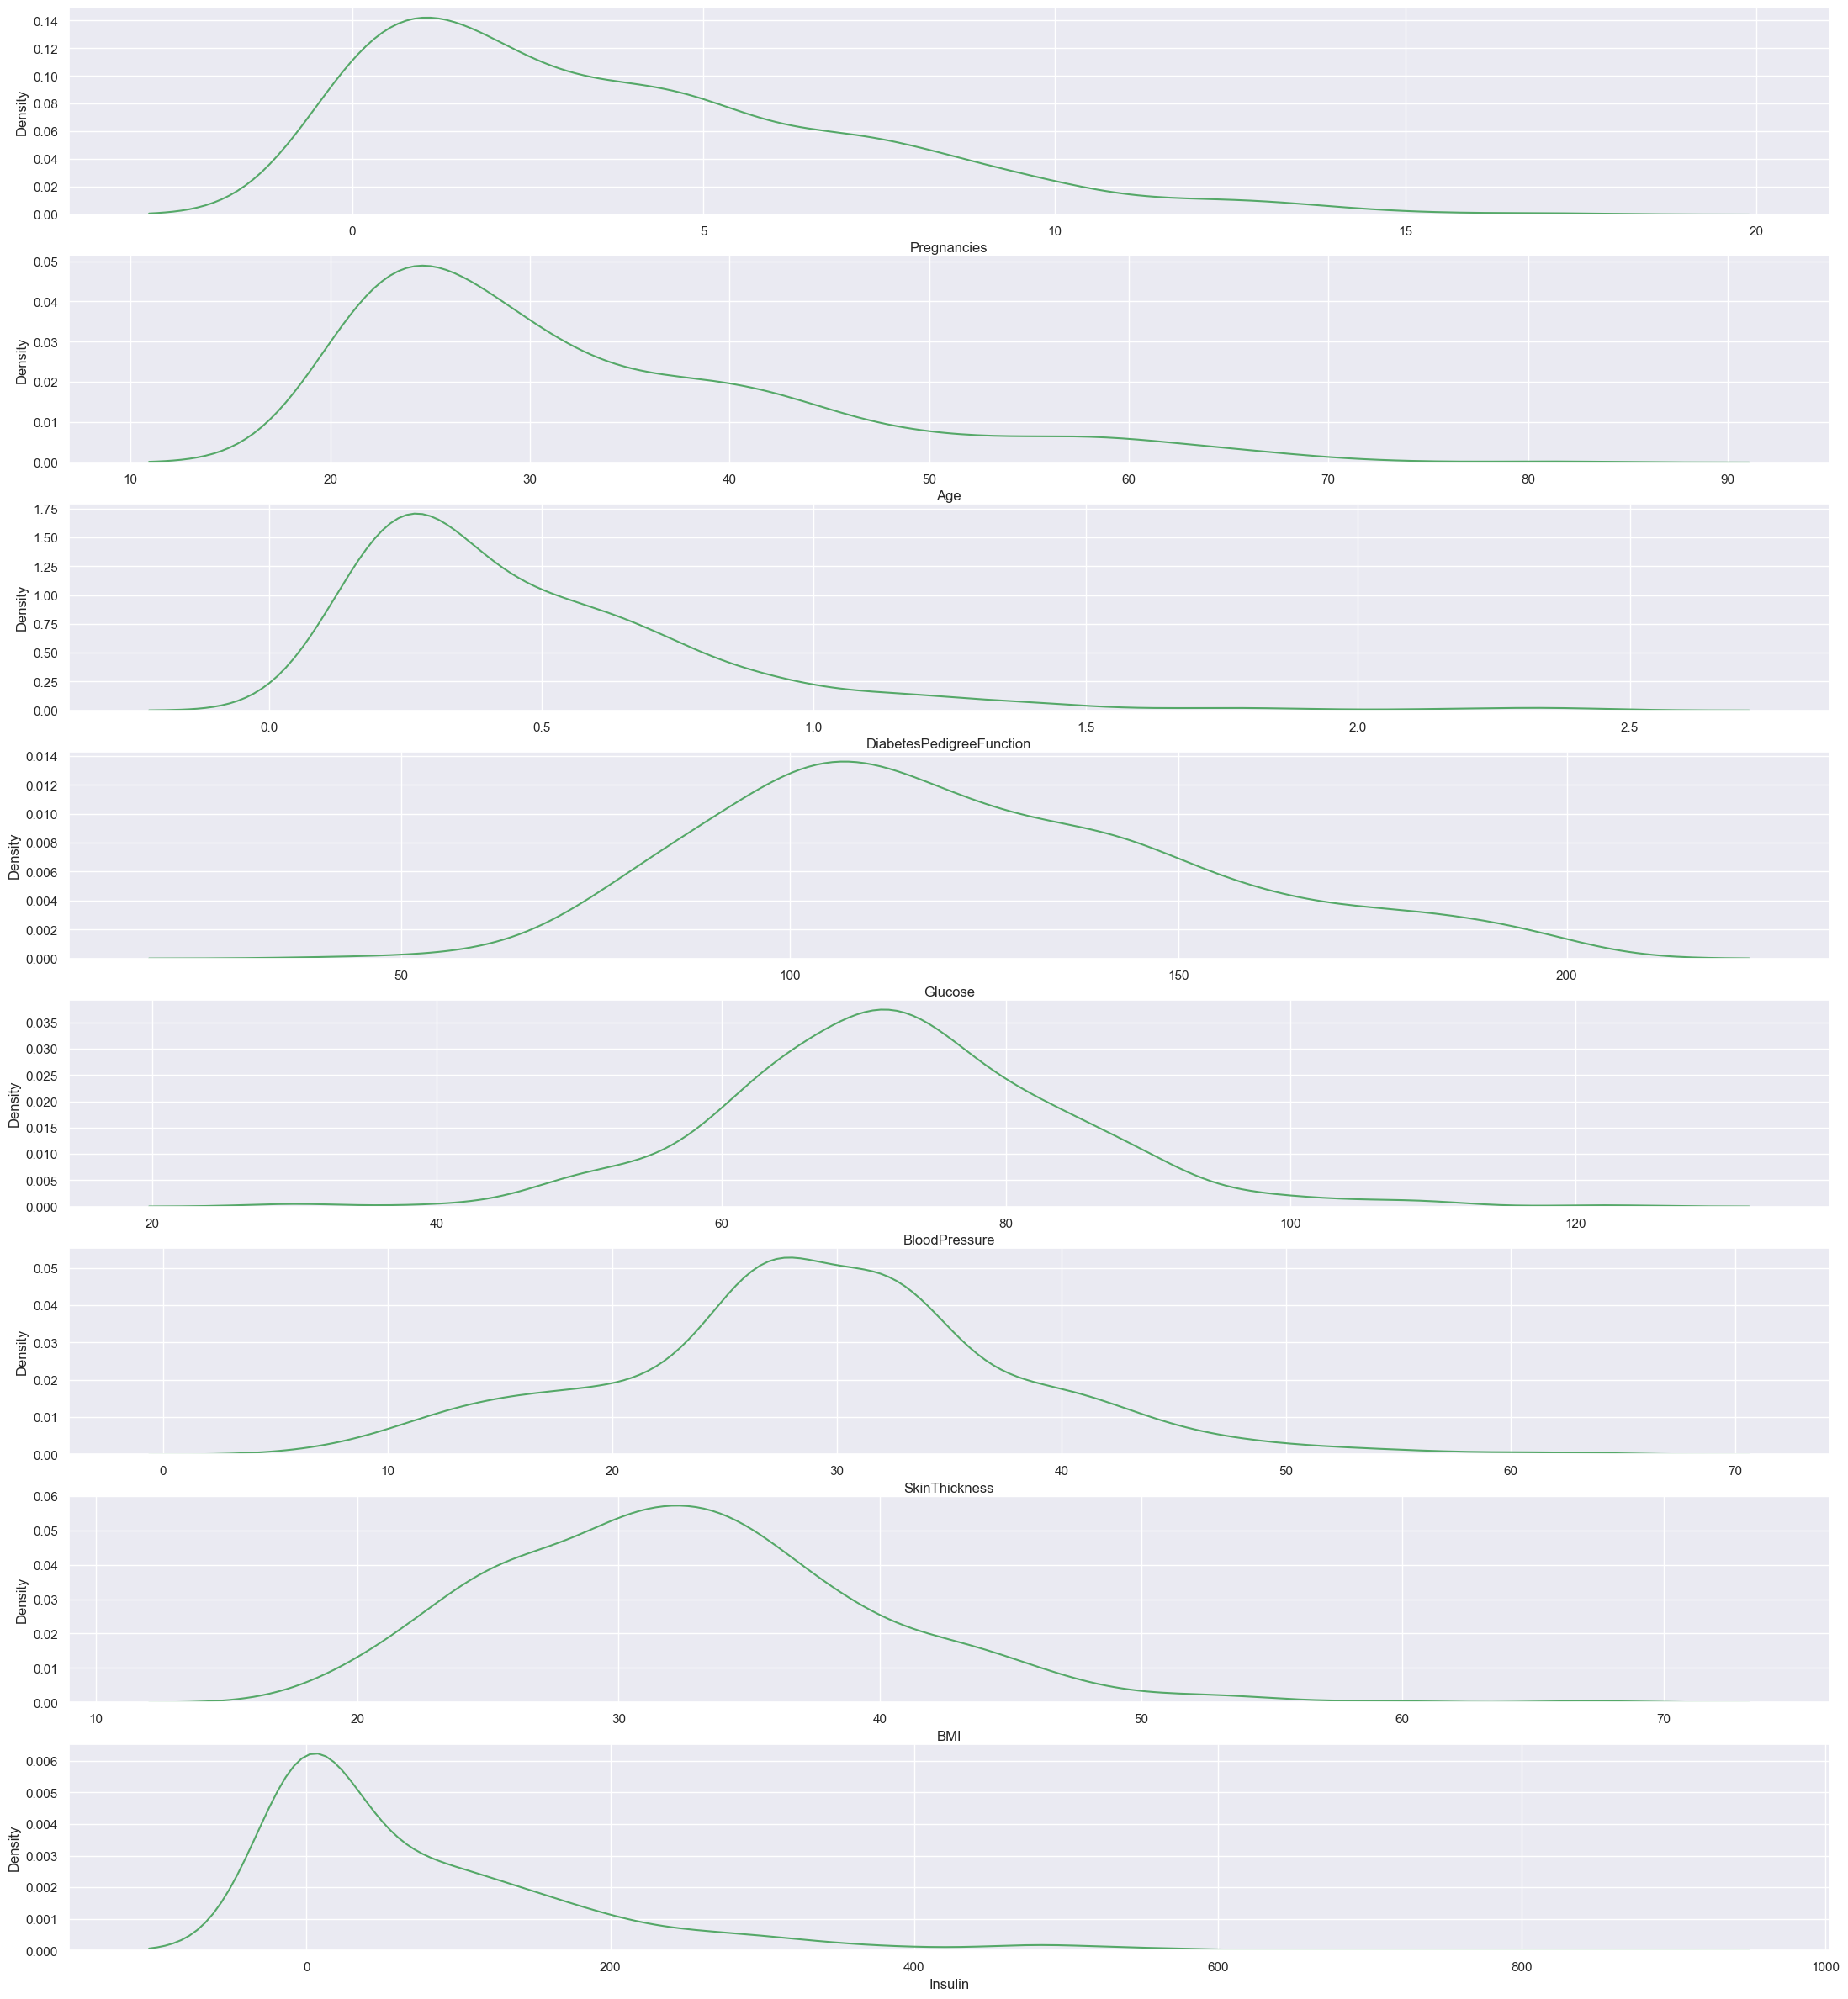

In [253]:
f, axes = plt.subplots(8, 1, figsize=(27, 30))
count = 0
for var in diabetes_filtered.columns:
    sb.kdeplot(diabetes_filtered[var], color="g", ax=axes[count])
    count += 1
    if count == 8:  # Prevent going out of bounds
        break
        

<h2> Classification Model WITHOUT Diabetes Pedigree Function (Decision Tree)

In [254]:
#x_ped stands for no pedigree
#out_x_ped stands for outcome with no pedigree

x_ped = diabetes_filtered[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
out_x_ped = diabetes_filtered[["Outcome"]]

x_ped_train, x_ped_test, out_x_ped_train, out_x_ped_test = train_test_split(x_ped, out_x_ped, test_size = 0.2)

print("Train set: ",x_ped_train.shape, out_x_ped_train.shape)
print("Test set: ", x_ped_test.shape, out_x_ped_test.shape)


Train set:  (399, 7) (399, 1)
Test set:  (100, 7) (100, 1)


In [255]:
out_x_ped_train["Outcome"].value_counts()

Outcome
0    252
1    147
Name: count, dtype: int64

In [256]:
x_ped_train.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   399.000000  399.000000     399.000000     399.000000  399.000000   
mean      3.804511  121.629000      72.105402      29.215052   81.977444   
std       3.344068   29.928571      11.694695       8.812526  117.691027   
min       0.000000   57.000000      30.000000       7.000000    0.000000   
25%       1.000000  100.000000      64.000000      25.000000    0.000000   
50%       3.000000  117.000000      72.000000      29.000000   40.000000   
75%       6.000000  141.000000      79.000000      33.000000  125.000000   
max      17.000000  197.000000     122.000000      63.000000  744.000000   

              BMI         Age  
count  399.000000  399.000000  
mean    32.767867   32.897243  
std      6.980795   11.436825  
min     18.400000   21.000000  
25%     27.800000   24.000000  
50%     32.400000   29.000000  
75%     36.550000   39.000000  
max     67.100000   81.000000

C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


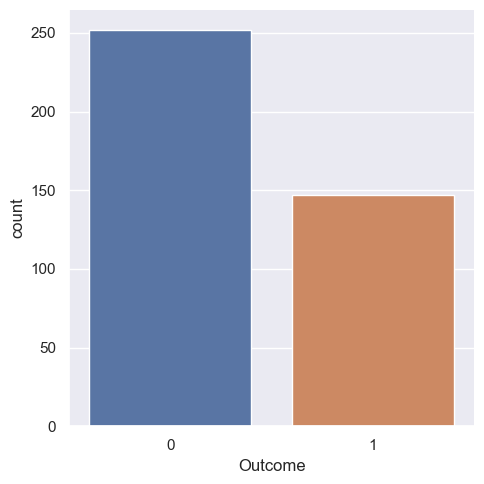

In [257]:
sb.catplot(x="Outcome", data=out_x_ped_train, kind="count")

<h3> Plotting all the different diagrams for the individual variables

In [258]:
# Draw the distributions of all Predictors

f, axes = plt.subplots(7, 3, figsize=(18, 16))


count = 0

for var in x_ped_train:

    sb.boxplot(data=x_ped_train[var], orient="h", ax=axes[count, 0])

    sb.histplot(data=x_ped_train[var], ax=axes[count, 1])

    sb.violinplot(data=x_ped_train[var], orient="h", ax=axes[count, 2])

    count += 1

plt.tight_layout()
plt.show()


C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.8% of the points c

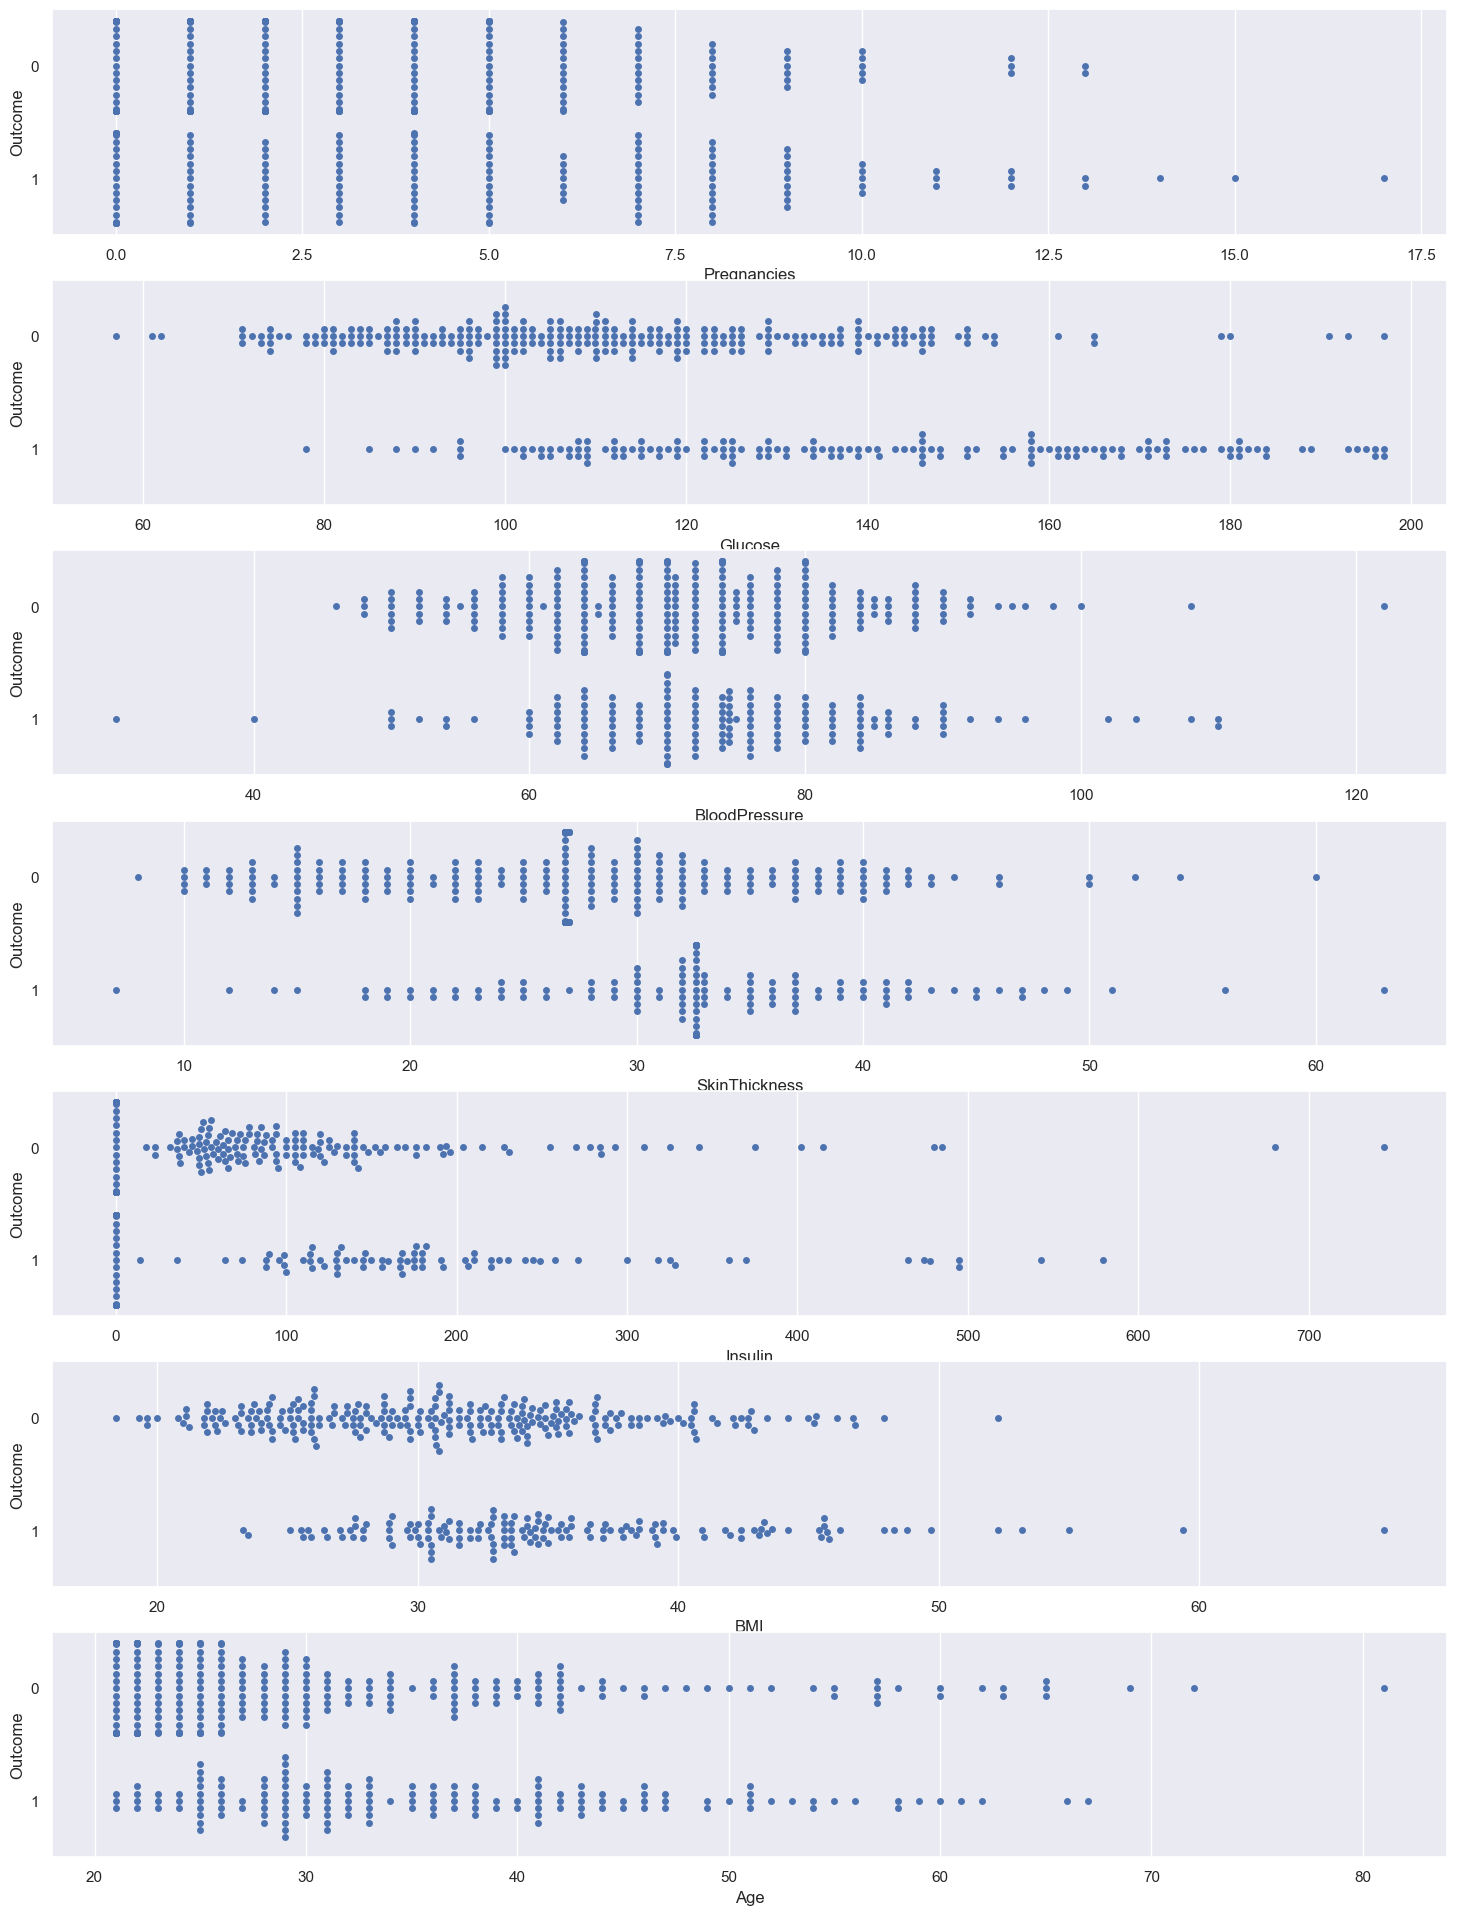

In [259]:
# Relationship between Response and the Predictors
x_pedigree = pd.concat([out_x_ped_train, x_ped_train], axis=1).reindex(
    out_x_ped_train.index
)

f, axes = plt.subplots(7, 1, figsize=(18, 24))

count = 0
for var in x_ped_train:
    sb.swarmplot(x=var, y="Outcome", data=x_pedigree, orient="h", ax=axes[count])
    count += 1

<h2> Training the Machine Model - Decision Tree

In [260]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=5)  # create the decision tree object
dectree.fit(
    x_ped_train, out_x_ped_train.values.ravel()
)  # train the decision tree model

DecisionTreeClassifier(max_depth=5)

In [261]:
f = plt.figure(figsize=(70, 70))

# Convert Index object to list
feature_names_list = x_ped_train.columns.tolist()

plot_tree(
    dectree,
    filled=True,
    rounded=True,
    feature_names=feature_names_list,
    class_names=["Non-Diabetic", "Diabetic"],
)
plt.show()


<h3> Goodness of fit of model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.899749373433584

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.83



<Axes: >

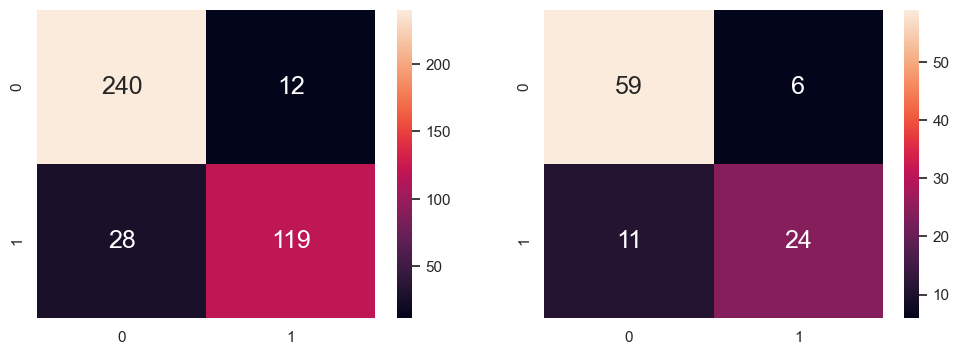

In [262]:
from sklearn.metrics import confusion_matrix


y_train_pred = dectree.predict(x_ped_train)
y_test_pred = dectree.predict(x_ped_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_ped_train, out_x_ped_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_ped_test, out_x_ped_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(out_x_ped_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(out_x_ped_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



<h3> Calculating the TPR/TNR/FPR/FNR

In [263]:
# Assuming the correct variable names are 'out_x_ped_train' and 'out_x_ped_test' for true labels
# and 'y_train_pred' and 'y_test_pred' for predicted labels
# The confusion matrix should be calculated with these variables

# Calculate confusion matrix for train
confusion_matrix_train = confusion_matrix(out_x_ped_train, y_train_pred)

# True Positives, False Positives, True Negatives, False Negatives for train
TP_train = confusion_matrix_train[1, 1]
FP_train = confusion_matrix_train[0, 1]
TN_train = confusion_matrix_train[0, 0]
FN_train = confusion_matrix_train[1, 0]

# Calculate rates for train
TPR_train = TP_train / (TP_train + FN_train)
TNR_train = TN_train / (TN_train + FP_train)
FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)

# Print rates for train
print("The TPR Train is :\t", TPR_train)
print("The TNR Train is :\t", TNR_train)
print("The FPR Train is :\t", FPR_train)
print("The FNR Train is :\t", FNR_train)

print()

# Calculate confusion matrix for test
confusion_matrix_test = confusion_matrix(out_x_ped_test, y_test_pred)

# True Positives, False Positives, True Negatives, False Negatives for test
TP_test = confusion_matrix_test[1, 1]
FP_test = confusion_matrix_test[0, 1]
TN_test = confusion_matrix_test[0, 0]
FN_test = confusion_matrix_test[1, 0]

# Calculate rates for test
TPR_test = TP_test / (TP_test + FN_test)
TNR_test = TN_test / (TN_test + FP_test)
FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)

# Print rates for test
print("The TPR Test is :\t", TPR_test)
print("The TNR Test is :\t", TNR_test)
print("The FPR Test is :\t", FPR_test)
print("The FNR Test is :\t", FNR_test)

The TPR Train is :	 0.8095238095238095
The TNR Train is :	 0.9523809523809523
The FPR Train is :	 0.047619047619047616
The FNR Train is :	 0.19047619047619047

The TPR Test is :	 0.6857142857142857
The TNR Test is :	 0.9076923076923077
The FPR Test is :	 0.09230769230769231
The FNR Test is :	 0.3142857142857143


<h2> Classification Model WITH Diabetes Pedigree Function (Decision Tree)

In [264]:
# ped stands for pedigree function involved
# out_ped stands for outcome with pedigree function

ped = diabetes_filtered[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]]
out_ped = diabetes_filtered[["Outcome"]]

ped_train, ped_test, out_ped_train, out_ped_test = train_test_split(ped, out_ped, test_size = 0.2)

print("Train set: ", ped_train.shape, out_ped_train.shape)
print("Test set: ", ped_test.shape, out_ped_test.shape)


Train set:  (399, 8) (399, 1)
Test set:  (100, 8) (100, 1)


In [265]:
out_ped_train["Outcome"].value_counts()


Outcome
0    257
1    142
Name: count, dtype: int64

In [266]:
ped_train.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   399.000000  399.000000     399.000000     399.000000  399.000000   
mean      3.716792  121.844539      72.163766      29.020744   78.335840   
std       3.336639   30.648747      12.020444       8.453932  121.025196   
min       0.000000   44.000000      30.000000       7.000000    0.000000   
25%       1.000000  100.000000      64.000000      25.000000    0.000000   
50%       3.000000  117.000000      70.607973      28.000000   23.000000   
75%       6.000000  141.132597      80.000000      33.000000  117.500000   
max      17.000000  197.000000     122.000000      60.000000  846.000000   

              BMI         Age  DiabetesPedigreeFunction  
count  399.000000  399.000000                399.000000  
mean    32.421751   32.799499                  0.476195  
std      6.931342   11.352723                  0.332828  
min     18.200000   21.000000                  0.078000  
25%     27.550000   24.000000                  0.251500  
50%     32.000000   29.000000                  0.380000  
75%     36.650000   39.000000                  0.628000  
max     67.100000   72.000000                  2.329000

In [267]:
sb.catplot(x="Outcome", data=out_ped_train, kind="count")

C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<h3> Plotting all the different diagrams for the individual variables

In [268]:
# Draw the distributions of all Predictors

f, axes = plt.subplots(8, 3, figsize=(18, 16))


count = 0

for var in ped_train:

    sb.boxplot(data=ped_train[var], orient="h", ax=axes[count, 0])

    sb.histplot(data=ped_train[var], ax=axes[count, 1])

    sb.violinplot(data=ped_train[var], orient="h", ax=axes[count, 2])

    count += 1

plt.tight_layout()
plt.show()


In [269]:
# Relationship between Response and the Predictors
pedigreeDF = pd.concat([out_ped_train, ped_train], axis=1).reindex(
    out_ped_train.index
)

f, axes = plt.subplots(8, 1, figsize=(18, 24))

count = 0
for var in ped_train:
    sb.swarmplot(x=var, y="Outcome", data=pedigreeDF, orient="h", ax=axes[count])
    count += 1
    

C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\byeoh\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.0% of the points

<h2> Training the Machine Model - Decision Tree

In [270]:
# Decision Tree using Train Data
dectreeP = DecisionTreeClassifier(max_depth=5)  # create the decision tree object
dectreeP.fit(
    ped_train, out_ped_train.values.ravel()
)  # train the decision tree model

DecisionTreeClassifier(max_depth=5)

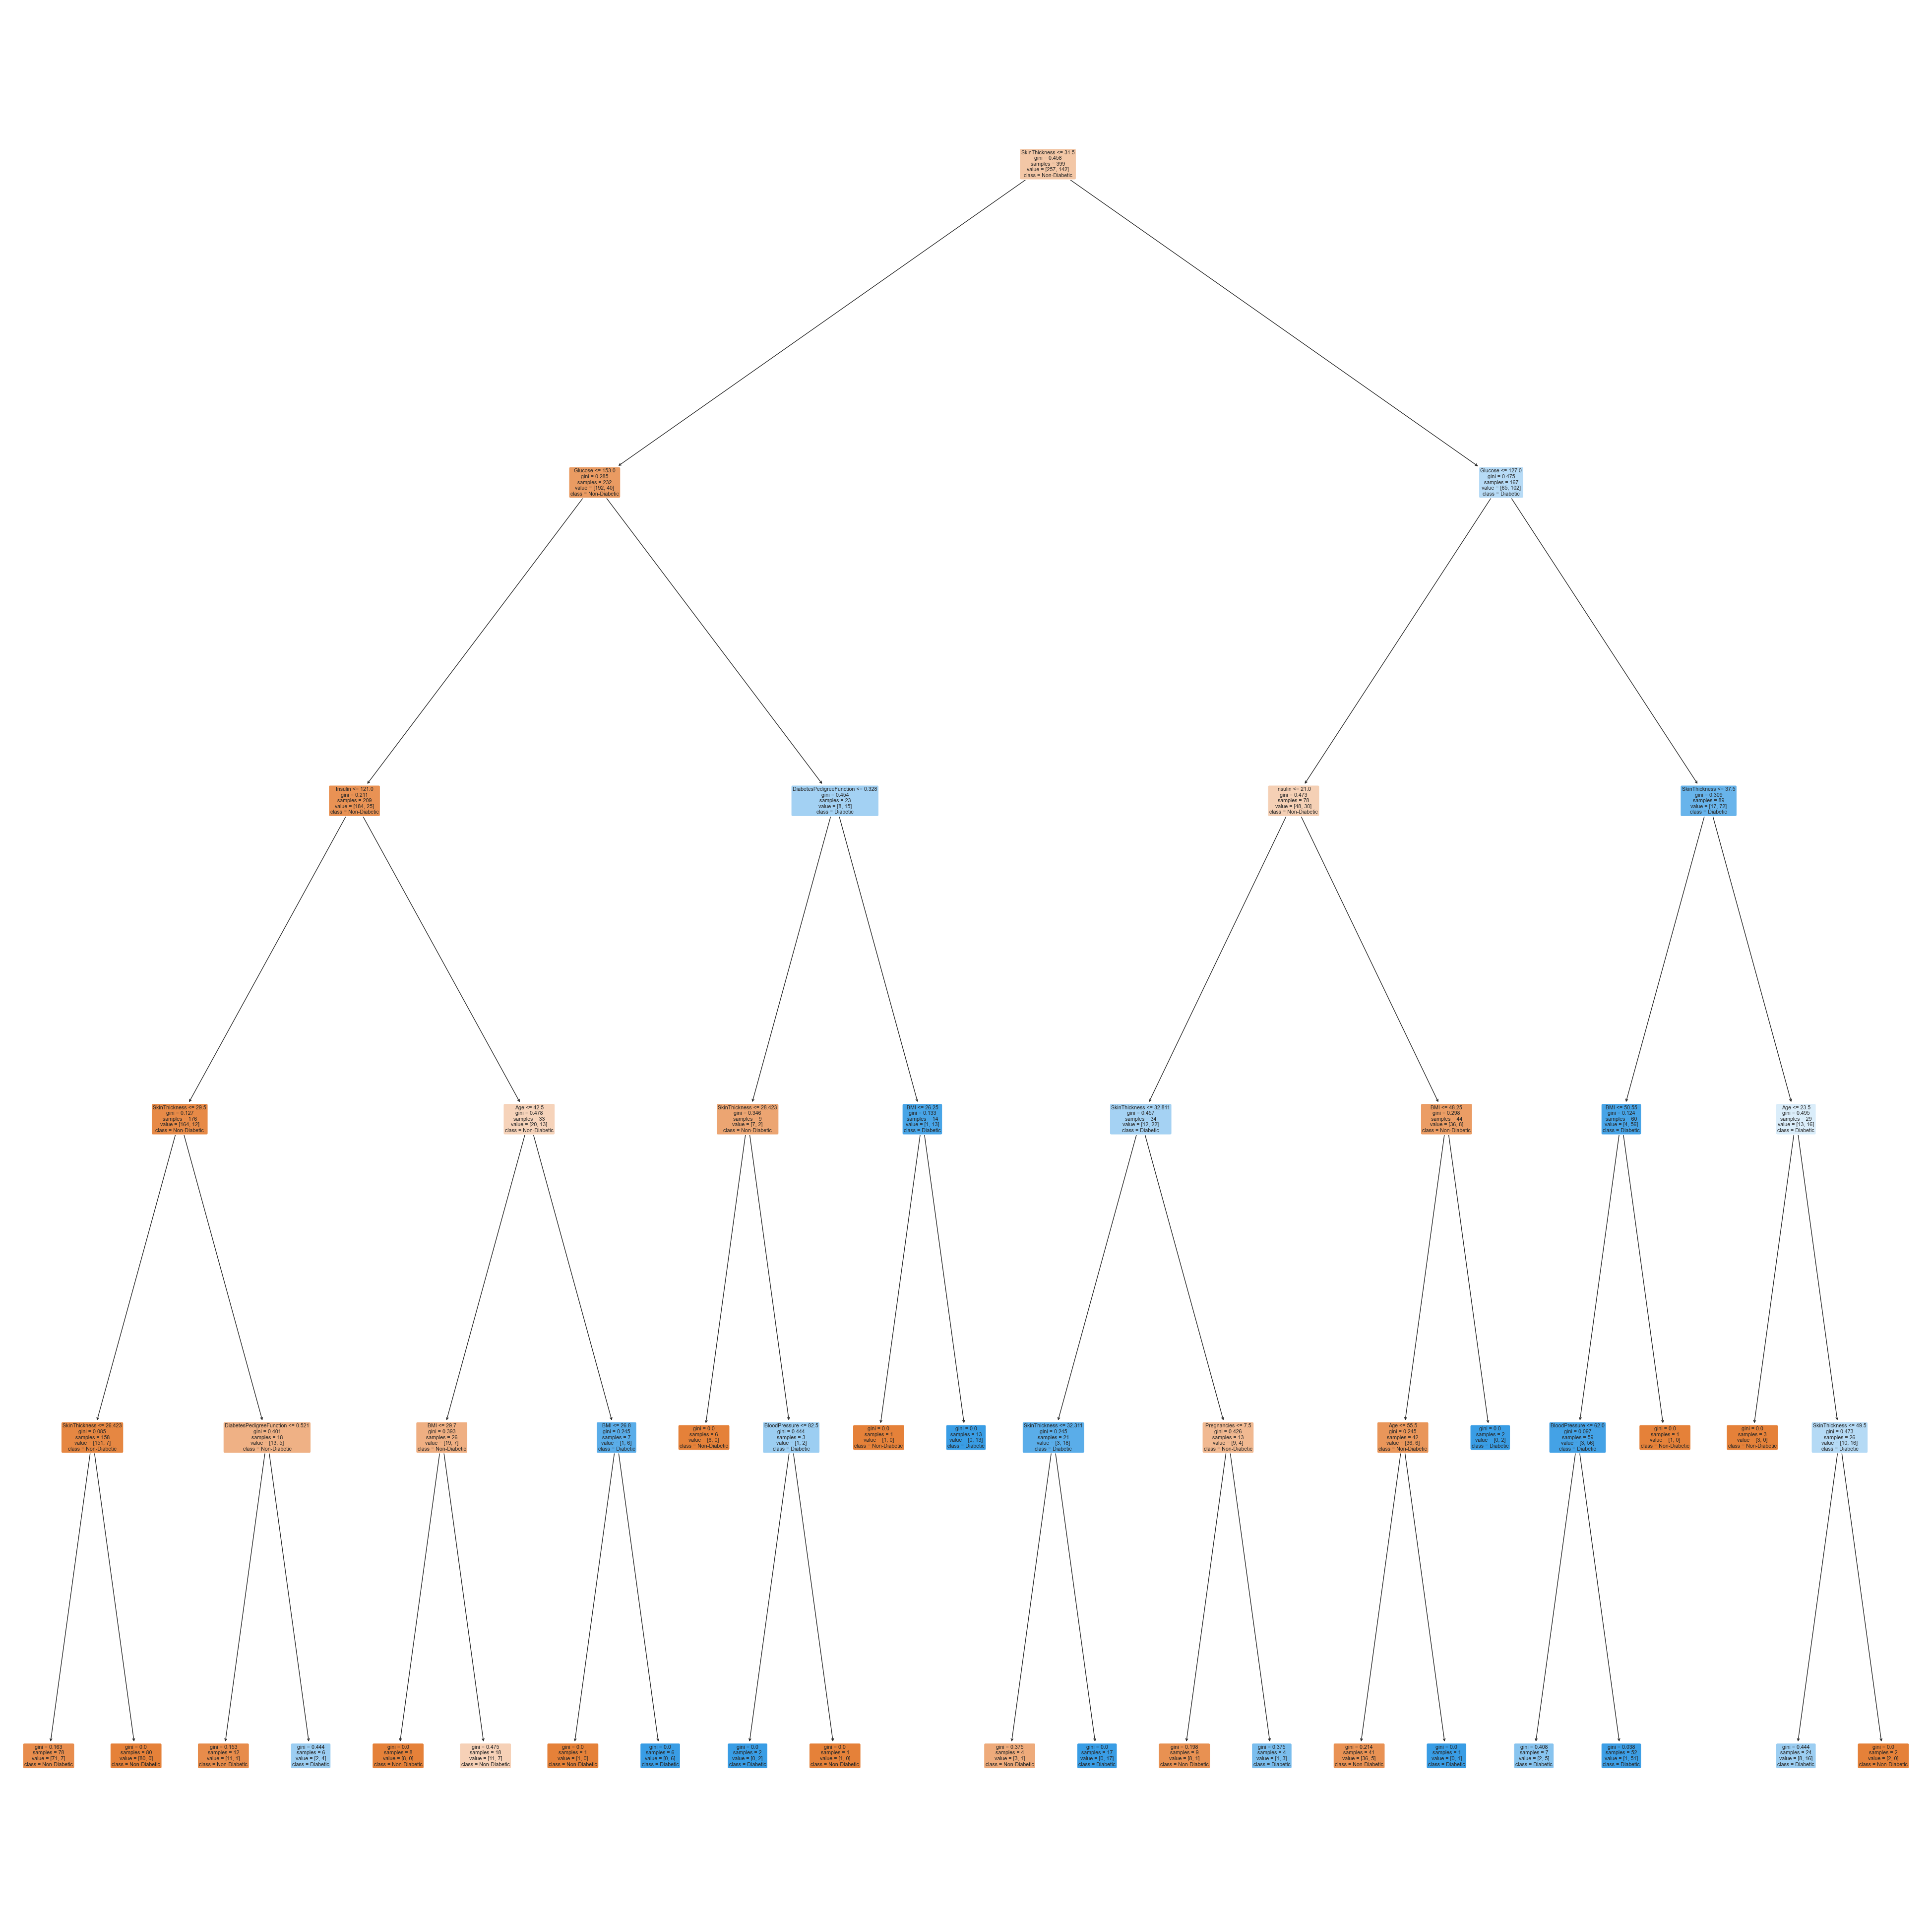

In [271]:
f = plt.figure(figsize=(50, 50))

# Convert Index object to list
feature_names_list = ped_train.columns.tolist()

plot_tree(
    dectreeP,
    filled=True,
    rounded=True,
    feature_names=feature_names_list,
    class_names=["Non-Diabetic", "Diabetic"],
)
plt.show()

<h3> Goodness of fit of Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9097744360902256

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.75



<Axes: >

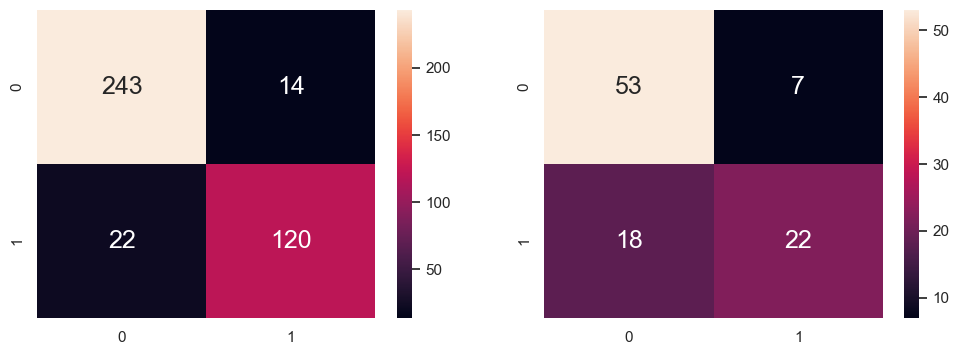

In [272]:

y_train_pred_P = dectreeP.predict(ped_train)
y_test_pred_P = dectreeP.predict(ped_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeP.score(ped_train, out_ped_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeP.score(ped_test, out_ped_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(out_ped_train, y_train_pred_P),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(out_ped_test, y_test_pred_P), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])



<h3> Calculating the TPR/TNR/FPR/FNR

In [273]:
# Calculate confusion matrix
confusion_matrix_result = confusion_matrix(out_ped_train, y_train_pred_P)

# True Positives, False Positives, True Negatives, False Negatives
TP = confusion_matrix_result[1, 1]
FP = confusion_matrix_result[0, 1]
TN = confusion_matrix_result[0, 0]
FN = confusion_matrix_result[1, 0]

# Calculate rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print rates
print("The TPR Train is :\t", TPR)
print("The TNR Train is :\t", TNR)
print("The FPR Train is :\t", FPR)
print("The FNR Train is :\t", FNR)

print()

# Calculate confusion matrix for test
confusion_matrix_test = confusion_matrix(out_ped_test, y_test_pred_P)

# True Positives, False Positives, True Negatives, False Negatives for test
TP_test = confusion_matrix_test[1, 1]
FP_test = confusion_matrix_test[0, 1]
TN_test = confusion_matrix_test[0, 0]
FN_test = confusion_matrix_test[1, 0]

# Calculate rates for test
TPR_test = TP_test / (TP_test + FN_test)
TNR_test = TN_test / (TN_test + FP_test)
FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)

# Print rates for test
print("The TPR Test is :\t", TPR_test)
print("The TNR Test is :\t", TNR_test)
print("The FPR Test is :\t", FPR_test)
print("The FNR Test is :\t", FNR_test)

The TPR Train is :	 0.8450704225352113
The TNR Train is :	 0.9455252918287937
The FPR Train is :	 0.054474708171206226
The FNR Train is :	 0.15492957746478872

The TPR Test is :	 0.55
The TNR Test is :	 0.8833333333333333
The FPR Test is :	 0.11666666666666667
The FNR Test is :	 0.45


<H2> Logistic Regression without Diabetes Pedigree Function

<h3> Finding out the accuracy function

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame containing the predictor and response variables
A = diabetes_filtered[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]]
B = diabetes_filtered["Outcome"]

# Split the data into training and testing sets
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(A_train, B_train)
# Make predictions on the testing data




C:\Users\byeoh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.7368421052631579


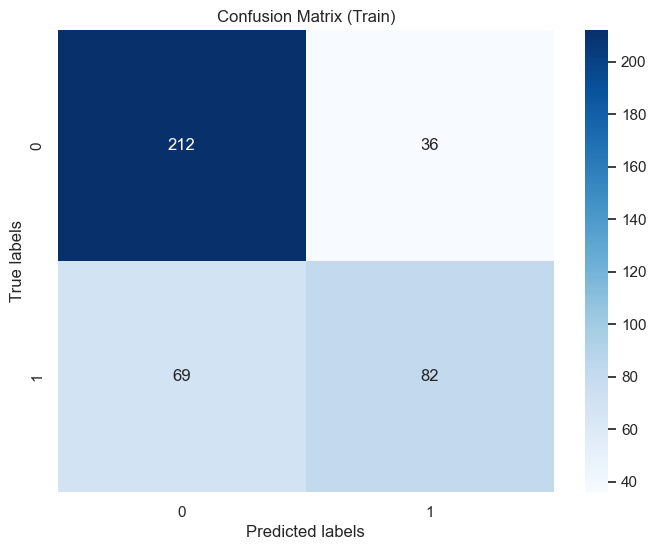

C:\Users\byeoh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.87


In [275]:
B_train_pred = model.predict(A_train)

# Create the confusion matrix
cm = confusion_matrix(B_train, B_train_pred)

accuracy = accuracy_score(B_train, B_train_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Train)")
plt.show()

model.fit(A_test, B_test)

B_test_pred = model.predict(A_test)

# Create the confusion matrix
cm1 = confusion_matrix(B_test, B_test_pred)

accuracy = accuracy_score(B_test, B_test_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Test)")
plt.show()



<h3> Calculating the TPR/TNR/FPR/FNR

In [276]:


# Calculate confusion matrix
cm_result = confusion_matrix(B_train, B_train_pred)

# True Positives, False Positives, True Negatives, False Negatives
TP = cm_result[1, 1]
FP = cm_result[0, 1]
TN = cm_result[0, 0]
FN = cm_result[1, 0]

# Calculate rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)


# Print rates
print("The TPR Train is :\t", TPR)
print("The TNR Train is :\t", TNR)
print("The FPR Train is :\t", FPR)
print("The FNR Train is :\t", FNR)
print()

cm_result = confusion_matrix(B_test, B_test_pred)

# True Positives, False Positives, True Negatives, False Negatives
TP = cm_result[1, 1]
FP = cm_result[0, 1]
TN = cm_result[0, 0]
FN = cm_result[1, 0]

# Calculate rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)



# Print rates
print("The TPR Test is :\t", TPR)
print("The TNR Test is :\t", TNR)
print("The FPR Test is :\t", FPR)
print("The FNR Test is :\t", FNR)


The TPR Train is :	 0.543046357615894
The TNR Train is :	 0.8548387096774194
The FPR Train is :	 0.14516129032258066
The FNR Train is :	 0.45695364238410596

The TPR Test is :	 0.7419354838709677
The TNR Test is :	 0.927536231884058
The FPR Test is :	 0.07246376811594203
The FNR Test is :	 0.25806451612903225


<H2> Logistic Regression with Diabetes Pedigree Function

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame containing the predictor and response variables
A1 = diabetes_filtered[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age","DiabetesPedigreeFunction"]]
B1 = diabetes_filtered["Outcome"]

# Split the data into training and testing sets
A1_train, A1_test, B1_train, B1_test = train_test_split(A1, B1, test_size=0.2)

# Create a logistic regression model
model1 = LogisticRegression()

# Fit the model on the training data
model1.fit(A1_train, B1_train)

# Make predictions on the testing data



C:\Users\byeoh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.7593984962406015


Accuracy: 0.75


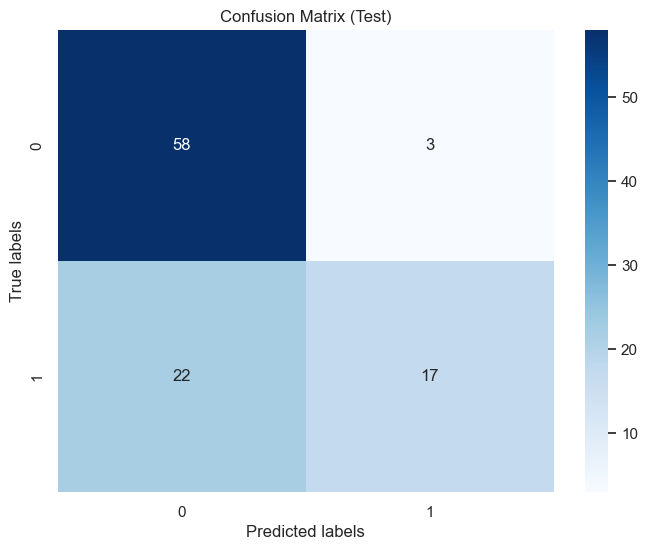

In [278]:
B1_train_pred = model1.predict(A1_train)

# Create the confusion matrix
cm2 = confusion_matrix(B1_train, B1_train_pred)

accuracy = accuracy_score(B1_train, B1_train_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Train)")
plt.show()


B1_test_pred = model1.predict(A1_test)
# Create the confusion matrix
cm3 = confusion_matrix(B1_test, B1_test_pred)

accuracy = accuracy_score(B1_test, B1_test_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm3, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Test)")
plt.show()

<h3> Calculating the TPR/TNR/FPR/FNR

In [279]:

B1_train_pred = model1.predict(A1_train)
# Calculate confusion matrix
cm1_result =  confusion_matrix(B1_train, B1_train_pred)

# True Positives, False Positives, True Negatives, False Negatives
TP = cm1_result[1, 1]
FP = cm1_result[0, 1]
TN = cm1_result[0, 0]
FN = cm1_result[1, 0]

# Calculate rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)


# Print rates
print("The TPR Train is :\t", TPR)
print("The TNR Train is :\t", TNR)
print("The FPR Train is :\t", FPR)
print("The FNR Train is :\t", FNR)
print()


B1_test_pred = model1.predict(A1_test)
# Calculate confusion matrix
cm1_result =  confusion_matrix(B1_test, B1_test_pred)

# True Positives, False Positives, True Negatives, False Negatives
TP = cm1_result[1, 1]
FP = cm1_result[0, 1]
TN = cm1_result[0, 0]
FN = cm1_result[1, 0]

# Calculate rates
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)


# Print rates
print("The TPR Test is :\t", TPR)
print("The TNR Test is :\t", TNR)
print("The FPR Test is :\t", FPR)
print("The FNR Test is :\t", FNR)

The TPR Train is :	 0.5454545454545454
The TNR Train is :	 0.87890625
The FPR Train is :	 0.12109375
The FNR Train is :	 0.45454545454545453

The TPR Test is :	 0.4358974358974359
The TNR Test is :	 0.9508196721311475
The FPR Test is :	 0.04918032786885246
The FNR Test is :	 0.5641025641025641


<h2> Conclusion

The classification decision tree model returns better results as compared to logistic regression as it has a higher classification accuracy due to it allowing users to modify the depth of the tree, hence, we chose to use the classifcation decision tree instead of the logistics regression tree. The False Negative Rate (FNR), of the model without Diabetes Pedigree Function is the the more important function we consider as in the context of health issues, it is better to err on the safe side. Particularly in this context, it is worse for one to be actually diabetic but the model predicting that they are not as compared to the model falsely predicting that you have diabetes but you do not actually have it. Since the FNR function is higher for both classification tree and logistic regression models which includes the Diabetic Pedigree function, we came to the conclusion that the Diabetes Pedigree Function is not as important in predicting Diabetes as compared to current health factors. We eventually did classification with the current health factors to determine which factor has the highest correlation with the outcome.

<h2> Using the Classification Decision Tree model to predict which variable is the most important to determining the outcome

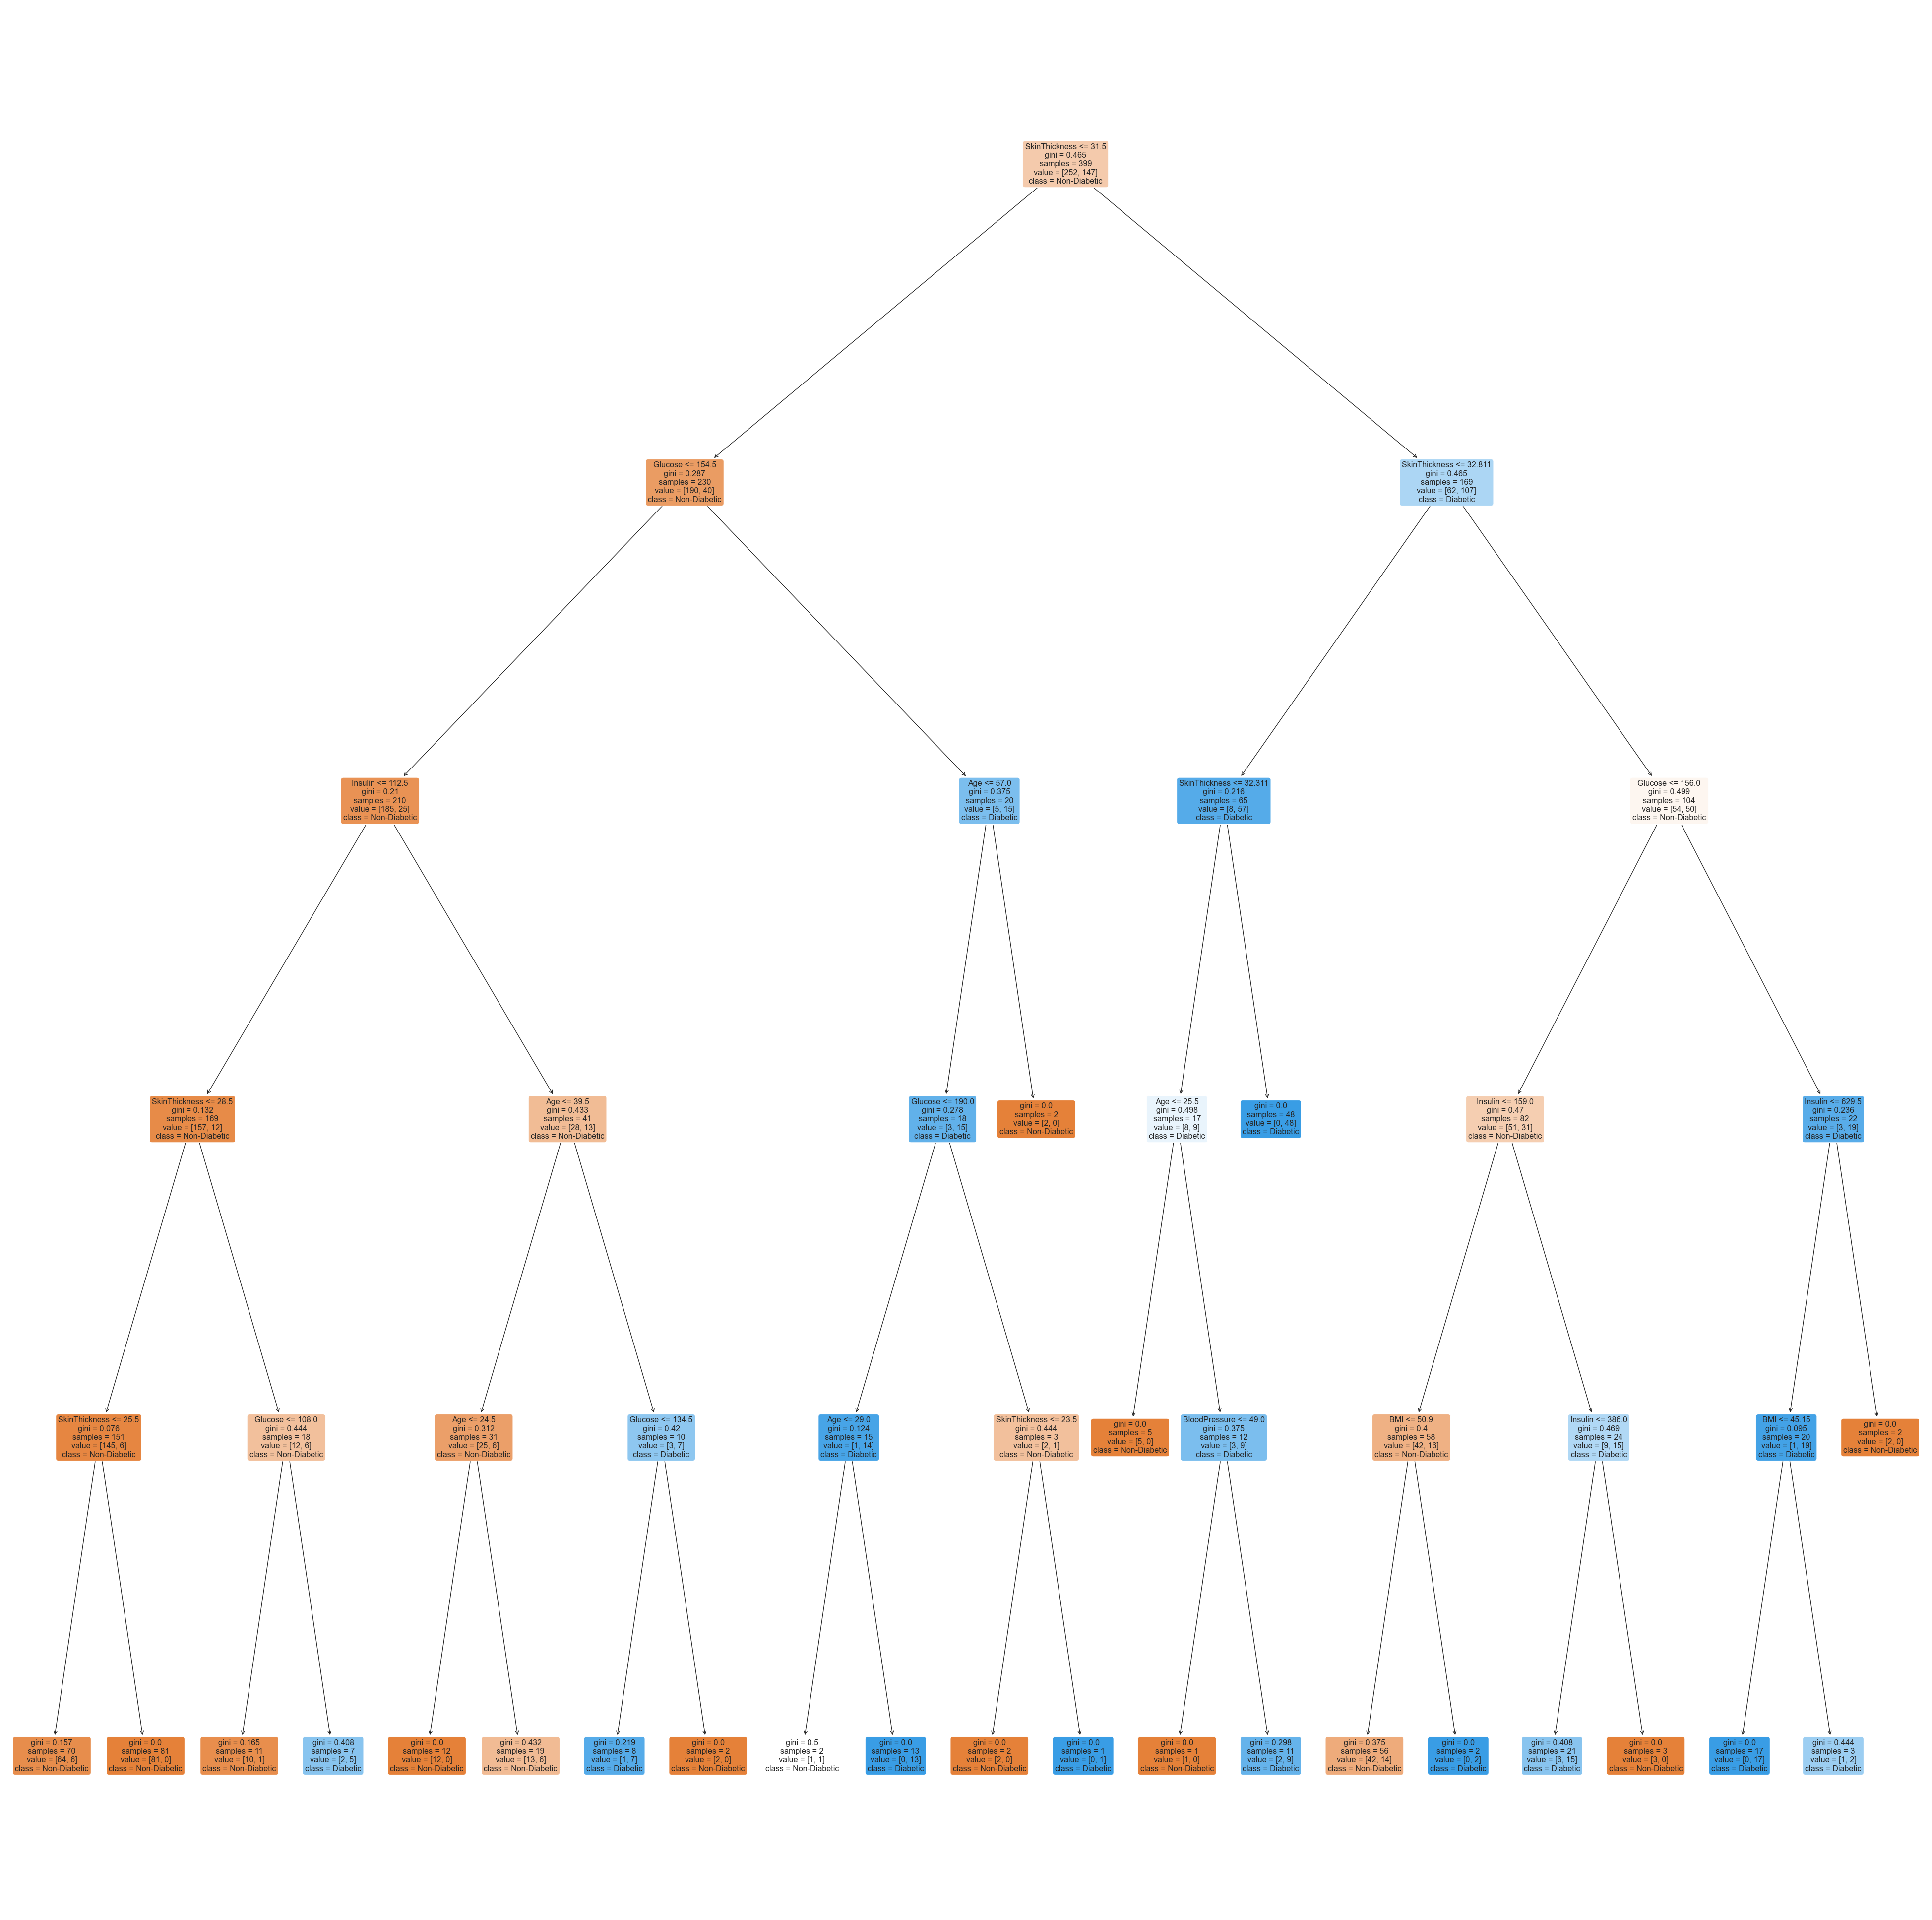

In [280]:
f = plt.figure(figsize=(50, 50))

# Convert Index object to list
feature_names_list = x_ped_train.columns.tolist()

plot_tree(
    dectree,
    filled=True,
    rounded=True,
    feature_names=feature_names_list,
    class_names=["Non-Diabetic", "Diabetic"],
)
plt.show()


In a decision tree model, the importance of a certain variable can be inferred based on two main factors, the frequency of apppearance as well as the position of the variable in the tree. The more frequently a variable appears in different nodes throughout the tree, the more important it tends to be. This indicates that the variable is being used multiple times to make decisions, suggesting its significance in the classification process. Variables that are closer to the root of the tree or higher up in the tree hierarchy are generally more important. This is because they contribute to making initial, more influential splits in the data, which have a cascading effect on subsequent splits. Variables closer to the root have a greater impact on determining the overall classification. Since the position of the variable Skin Thickness is at the top of the chain and it frequently appears at the top half of the chain, it appears that Skin Thickness is considered to be the most important variable in predicting the outcome of one having diabetes.